In [1]:
# Scientific and Data Manipulation Libraries :
import pandas as pd
import numpy as np
import math
import gc
import os

# ML Libraries :
from sklearn.preprocessing            import LabelEncoder, OneHotEncoder 
from sklearn.preprocessing            import StandardScaler, MinMaxScaler, Normalizer, RobustScaler, MaxAbsScaler
from sklearn.model_selection          import KFold, StratifiedKFold, train_test_split, cross_val_score
from sklearn.tree                     import DecisionTreeClassifier
from sklearn.ensemble                 import VotingClassifier, RandomForestClassifier
from sklearn.metrics                  import f1_score, confusion_matrix, classification_report

# Data Visualization Libraries :
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
import plotly.graph_objects as go
import plotly.express as px

# Warning Libraries :
import warnings
warnings.filterwarnings('ignore')      # To ignore warnings
pd.set_option("display.max_columns",None)


In [2]:
# By using pandas package to read CSV file
# By using head(), str() to check data imported properly

train_data=pd.read_csv(r"C:\Users\BLACK LION\Desktop\Internship\Train_data.csv")
train_data.head()      # using head()function shows top 5 rows of data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
test_data=pd.read_csv(r"C:\Users\BLACK LION\Desktop\Internship\Test_data.csv")
test_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [4]:
# filling missing values

train_data['education'].fillna(train_data['education'].mode()[0], inplace = True)
train_data['previous_year_rating'].fillna(1, inplace = True)

# again checking if there is any Null value left in the data
train_data.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [5]:
# filling missing values

test_data['education'].fillna(test_data['education'].mode()[0], inplace = True)
test_data['previous_year_rating'].fillna(1, inplace = True)

# again checking if there is any Null value left in the data
test_data.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [6]:
# removing the employee_id column

train_data = train_data.drop(['employee_id'], axis = 1)

train_data.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [7]:
# removing the employee_id column

test_data = test_data.drop(['employee_id'], axis = 1)

test_data.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score'],
      dtype='object')

# Binary Classification Model:

##### Encoding :
Converting the categorical features into binary or numerical counterparts


In [8]:
def data_encoding( encoding_strategy , encoding_data , encoding_columns ):
    
    if encoding_strategy == "LabelEncoding":
        print("IF LabelEncoding")
        Encoder = LabelEncoder()
        for column in encoding_columns :
            print("column",column )
            encoding_data[ column ] = Encoder.fit_transform(tuple(encoding_data[ column ]))
        
    elif encoding_strategy == "OneHotEncoding":
        print("ELIF OneHotEncoding")
        encoding_data = pd.get_dummies(encoding_data)
        
    dtypes_list =['float64','float32','int64','int32']
    encoding_data.astype( dtypes_list[0] ).dtypes
    
    return encoding_data

In [9]:
encoding_columns  = [ "region", "age","department", "education", "gender", "recruitment_channel" ]
encoding_strategy = [ "LabelEncoding", "OneHotEncoding"]

train_encode = data_encoding( encoding_strategy[1] , train_data , encoding_columns )
test_encode =  data_encoding( encoding_strategy[1] , test_data  , encoding_columns )

ELIF OneHotEncoding
ELIF OneHotEncoding


In [10]:
train_encode.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_1,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1,35,5.0,8,1,0,49,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1
1,1,30,5.0,4,0,0,60,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
2,1,34,3.0,7,0,0,50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
3,2,39,1.0,10,0,0,50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
4,1,45,3.0,2,0,0,73,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0


In [11]:
test_encode.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_1,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1,24,1.0,1,1,0,77,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
1,1,31,3.0,5,0,0,51,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0
2,1,31,1.0,4,0,0,47,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
3,3,31,2.0,9,0,0,65,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
4,1,30,4.0,7,0,0,61,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1


FEATURE SCALING

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, RobustScaler, MaxAbsScaler
def data_scaling( scaling_strategy , scaling_data , scaling_columns ):
    
    if    scaling_strategy =="RobustScaler" :
        scaling_data[scaling_columns] = RobustScaler().fit_transform(scaling_data[scaling_columns])
        
    elif  scaling_strategy =="StandardScaler" :
        scaling_data[scaling_columns] = StandardScaler().fit_transform(scaling_data[scaling_columns])
        
    elif  scaling_strategy =="MinMaxScaler" :
        scaling_data[scaling_columns] = MinMaxScaler().fit_transform(scaling_data[scaling_columns])
        
    elif  scaling_strategy =="MaxAbsScaler" :
        scaling_data[scaling_columns] = MaxAbsScaler().fit_transform(scaling_data[scaling_columns])
        
    else :  # If any other scaling send by mistake still perform Robust Scalar
        scaling_data[scaling_columns] = RobustScaler().fit_transform(scaling_data[scaling_columns])
    
    return scaling_data

In [13]:
scaling_st=["RobustScaler" ,"StandardScaler","MinMaxScaler","MaxAbsScaler"]

train_scale=data_scaling(scaling_st[0],train_encode,train_encode.columns)
test_scale=data_scaling(scaling_st[0],test_encode,test_encode.columns)

Split target variable and predictors

In [14]:
X=train_scale.drop(['is_promoted'],axis=1)
Y=train_data.is_promoted

 ### Train test split

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,stratify=Y)

OVERSAMPLING

Checking of the data is unbalanced or balanced

In [16]:
Y_train.value_counts(normalize=True)*100

0    91.48383
1     8.51617
Name: is_promoted, dtype: float64

Cleary we can see data is unbalanced with only 8% of 1s in it so we have to use over Sampling on the data so as to make it balanced

### Using Smote Over Sampling Method

In [17]:
rs=1331
from imblearn.combine import SMOTETomek
def oversample(X,Y):
    over_sample = SMOTETomek(random_state=rs)
    X_over,Y_over = over_sample.fit_resample(X,Y)
    return X_over,Y_over

In [18]:
X_train_os,Y_train_os=oversample(X_train,Y_train)

FEATURE SELECTION

In [19]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, Y_train)

### FEATURE SCORES 
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(feature_scores)


avg_training_score              0.288405
age                             0.136946
length_of_service               0.109536
previous_year_rating            0.058964
KPIs_met >80%                   0.050275
awards_won?                     0.030721
no_of_trainings                 0.026166
department_Sales & Marketing    0.023825
department_Operations           0.016558
recruitment_channel_other       0.016262
recruitment_channel_sourcing    0.016082
gender_m                        0.013362
gender_f                        0.013290
region_region_2                 0.012551
department_Analytics            0.011941
department_Procurement          0.011450
department_Technology           0.009255
region_region_7                 0.008624
region_region_22                0.008282
education_Bachelor's            0.007198
department_Finance              0.006952
region_region_13                0.006937
education_Master's & above      0.006775
region_region_15                0.006728
region_region_4 

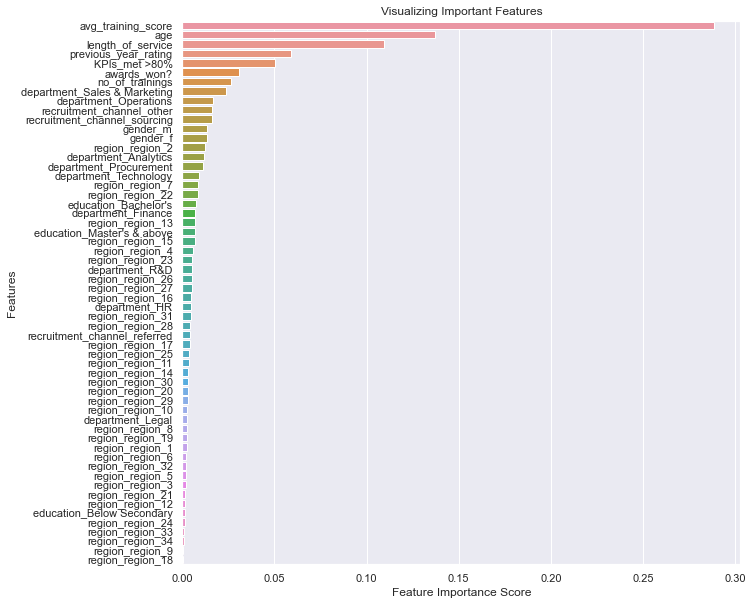

In [20]:
### PLOT TO VISUALIZE
sns.set(rc={'figure.figsize':(10,10)})
sns.barplot(x=feature_scores, y=feature_scores.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
# Add title to the graph
plt.title("Visualizing Important Features")
# Visualize the graph
plt.show()

# Model Building

We will using three model for this problem
1.CatBoost
2.XGBoost
3.LightGBM

In [21]:
# Boosting Algorithms :
# CatBoost 
from sklearn.model_selection          import RandomizedSearchCV
from catboost                         import CatBoostClassifier
mod= CatBoostClassifier(random_state=rs)

par={'max_depth':[5,10,None],
              'n_estimators':[200,300,400,500,600],'learning_rate':[0.1,0.01,0.001]}
def hyperparameter_tuning(mod,param_d,p,q):
    rdmsearch=  RandomizedSearchCV(mod, param_distributions=param_d,n_jobs=-1,cv=9,scoring='roc_auc')
    rdmsearch.fit(p,q)
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    return ht_params, ht_score


rf_parameters, rf_ht_score = hyperparameter_tuning(mod, par,  X_train_os,Y_train_os)


0:	learn: 0.5822697	total: 293ms	remaining: 58.2s
1:	learn: 0.5166530	total: 441ms	remaining: 43.7s
2:	learn: 0.4755604	total: 592ms	remaining: 38.9s
3:	learn: 0.4343913	total: 733ms	remaining: 35.9s
4:	learn: 0.4061537	total: 883ms	remaining: 34.5s
5:	learn: 0.3841311	total: 1.03s	remaining: 33.5s
6:	learn: 0.3649180	total: 1.19s	remaining: 32.9s
7:	learn: 0.3431202	total: 1.35s	remaining: 32.4s
8:	learn: 0.3302179	total: 1.52s	remaining: 32.3s
9:	learn: 0.3209679	total: 1.69s	remaining: 32.2s
10:	learn: 0.3125051	total: 1.85s	remaining: 31.8s
11:	learn: 0.3064891	total: 2.02s	remaining: 31.7s
12:	learn: 0.2963433	total: 2.17s	remaining: 31.2s
13:	learn: 0.2783541	total: 2.33s	remaining: 30.9s
14:	learn: 0.2749984	total: 2.48s	remaining: 30.6s
15:	learn: 0.2697619	total: 2.65s	remaining: 30.5s
16:	learn: 0.2593583	total: 2.81s	remaining: 30.2s
17:	learn: 0.2535272	total: 2.96s	remaining: 30s
18:	learn: 0.2491977	total: 3.12s	remaining: 29.7s
19:	learn: 0.2447865	total: 3.28s	remaining

In [22]:
print(rf_parameters, rf_ht_score)

{'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.1} 0.9919604387685611


In [23]:
# XGBoost
from xgboost                          import XGBClassifier

mod=XGBClassifier(random_state=rs)
param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10], 
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500]
                }
rf_parameters_xgb, rf_ht_score_xgb = hyperparameter_tuning(mod, param_tuning,  X_train_os,Y_train_os)

[10:51:34] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [24]:
print(rf_parameters_xgb, rf_ht_score_xgb)

{'subsample': 0.5, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 0.7} 0.9926358714017497


In [27]:
# LightGBM
from lightgbm                         import LGBMClassifier
lgb = LGBMClassifier()
lgb.fit(X_train_os,Y_train_os)

lgb_pred = lgb.predict(X_test)

print("Training Accuracy :", lgb.score(X_train_os, Y_train_os))

Training Accuracy : 0.9679758535180222


In [28]:
# Create a Dictionary (Key->Value Pairs) for "ML Model Name"-> "ML Model Functions with Hyper-Parameters" :

Classifiers = {'0.XGBoost' : XGBClassifier(learning_rate =0.1, 
                                           n_estimators=394, 
                                           max_depth=10, 
                                           subsample = 0.50, 
                                           verbosity = 0,
                                           scale_pos_weight = 2.5,
                                           updater ="grow_histmaker",
                                           base_score  = 0.2,
                                          min_child_weight=1),
                            
               '1.CatBoost' : CatBoostClassifier(learning_rate=0.1, 
                                                 n_estimators=300, 
                                                 subsample=0.085, 
                                                 max_depth=10, 
                                                 scale_pos_weight=2.5),
               
               '2.LightGBM' : LGBMClassifier(subsample_freq = 2, 
                                             objective ="binary",
                                             importance_type = "gain",
                                             verbosity = -1, 
                                             max_bin = 60,
                                             num_leaves = 300,
                                             boosting_type = 'dart',
                                             learning_rate=0.10, 
                                             n_estimators=494,
                                             max_depth=10, 
                                             scale_pos_weight=2.5)
 }

print( list(Classifiers.keys()) )
print("-*-"*25)
print( list(Classifiers.values()) )

['0.XGBoost', '1.CatBoost', '2.LightGBM']
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
[XGBClassifier(base_score=0.2, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_delta_step=None, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=394, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=2.5, subsample=0.5,
              tree_method=None, updater='grow_histmaker',
              validate_parameters=None, verbosity=0), <catboost.core.CatBoostClassifier object at 0x000001C432D7DF10>, LGBMClassifier(boosting_type='dart', importance_type='gain', max_bin=60,
               max_depth=10,

##### Used Voting classifier - A Voting Classifier is a machine learning model that trains on an ensemble of numerous models and predicts an output (class) based on their highest probability of chosen class as the output.

##### Soft Voting -In soft voting, the output class is the prediction based on the average of probability given to that class. Suppose given some input to three models, the prediction probability for class A = (0.30, 0.47, 0.53) and B = (0.20, 0.32, 0.40). So the average for class A is 0.4333 and B is 0.3067, the winner is clearly class A because it had the highest probability averaged by each classifier.

In [29]:
from sklearn.ensemble import VotingClassifier
voting_model = VotingClassifier(estimators=[
                                              ('XGBoost_Best', list(Classifiers.values())[0]), 
                                              ('CatBoost_Best', list(Classifiers.values())[1]),
                                              ('LightGBM_Best', list(Classifiers.values())[2]),
                                             ], 
                                              voting='soft',weights=[5,5,5.2])

voting_model.fit(X_train_os,Y_train_os) 

predictions_of_voting = voting_model.predict_proba( test_encode )[::,1]

0:	learn: 0.5924784	total: 121ms	remaining: 36.1s
1:	learn: 0.5169447	total: 246ms	remaining: 36.6s
2:	learn: 0.4595461	total: 379ms	remaining: 37.6s
3:	learn: 0.4016885	total: 503ms	remaining: 37.2s
4:	learn: 0.3733338	total: 634ms	remaining: 37.4s
5:	learn: 0.3479194	total: 752ms	remaining: 36.9s
6:	learn: 0.3349688	total: 879ms	remaining: 36.8s
7:	learn: 0.3191739	total: 999ms	remaining: 36.5s
8:	learn: 0.3075100	total: 1.13s	remaining: 36.6s
9:	learn: 0.2957741	total: 1.25s	remaining: 36.4s
10:	learn: 0.2892847	total: 1.38s	remaining: 36.2s
11:	learn: 0.2819636	total: 1.5s	remaining: 35.9s
12:	learn: 0.2750225	total: 1.61s	remaining: 35.6s
13:	learn: 0.2670360	total: 1.73s	remaining: 35.4s
14:	learn: 0.2624296	total: 1.86s	remaining: 35.4s
15:	learn: 0.2581285	total: 1.98s	remaining: 35.2s
16:	learn: 0.2526938	total: 2.12s	remaining: 35.3s
17:	learn: 0.2500622	total: 2.24s	remaining: 35.1s
18:	learn: 0.2453636	total: 2.38s	remaining: 35.2s
19:	learn: 0.2408817	total: 2.51s	remainin

In [30]:
predictions_of_voting

array([3.27097117e-01, 1.93037950e-03, 1.25769009e-04, ...,
       7.27701880e-04, 5.97728262e-03, 9.46304699e-01])

In [31]:
y_pred_class = [int(round(value)) for value in predictions_of_voting]

### Final ensembel model after hyperparameter tuning

In [32]:
# Data Visualization Libraries :
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
import plotly.graph_objects as go
import plotly.express as px

['0.XGBoost', '1.CatBoost', '2.LightGBM']


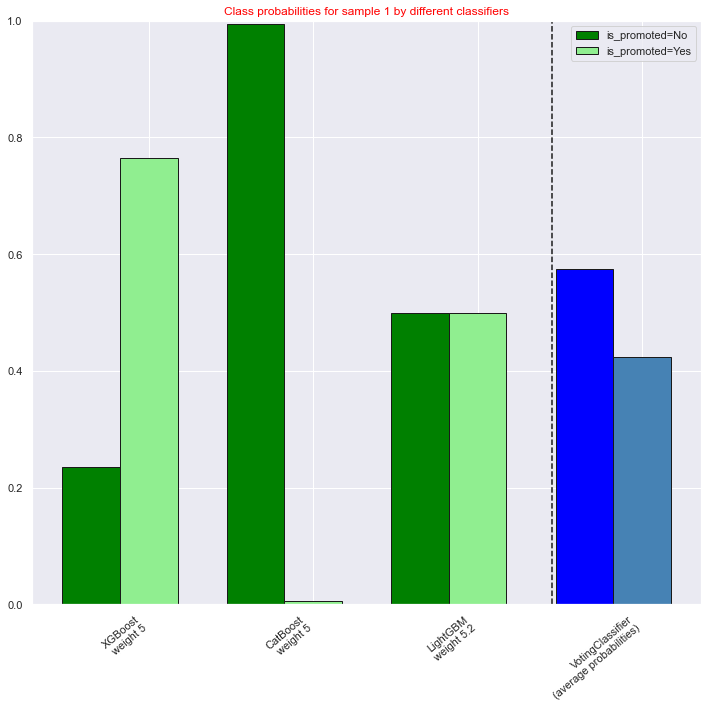

In [33]:
Classifiers = {'0.XGBoost' : XGBClassifier(learning_rate =0.1, 
                                           n_estimators=394, 
                                           max_depth=5,
                                           subsample = 0.70, 
                                           verbosity = 0,
                                           scale_pos_weight = 2.5,
                                           updater ="grow_histmaker",
                                           base_score  = 0.2),
               
            
               '1.CatBoost' : CatBoostClassifier(learning_rate=0.15, 
                                                 n_estimators=300, 
                                                 max_depth=5, 
                                                 scale_pos_weight=2.5,
                                                verbose=False),
               
               '2.LightGBM' : LGBMClassifier(learning_rate=0.15, 
                                             n_estimators=494,
                                             subsample_freq = 2, 
                                             objective ="binary",
                                             importance_type = "gain",
                                             verbosity = -1, 
                                             max_bin = 60,
                                             num_leaves = 300,
                                             boosting_type = 'dart',                                            
                                             max_depth=5, 
                                             scale_pos_weight=2.5)
                }

print( list(Classifiers.keys()) )

clf1 = list(Classifiers.values())[0]
clf2 =list(Classifiers.values())[1]
clf3 = list(Classifiers.values())[2]
X = np.array([[-1.0, -1.0], [-1.2, -1.4], [-3.4, -2.2], [1.1, 1.2]])
y = np.array([1, 1, 2, 2])

eclf = VotingClassifier(estimators=[('xgboost', clf1), 
                                    ('catboost', clf2), 
                                    ('lgbm', clf3)],
                        voting='soft',
                        weights=[5, 5, 5.2])

# predict class probabilities for all classifiers
probas = [c.fit(X, y).predict_proba(X) for c in (clf1, clf2, clf3, eclf)]

# get class probabilities for the first sample in the dataset
class1_1 = [pr[0, 0] for pr in probas]
class2_1 = [pr[0, 1] for pr in probas]

# plotting

N = 4  # number of groups
ind = np.arange(N)  # group positions
width = 0.35  # bar width

fig, ax = plt.subplots()

# bars for classifier 1-3
p1 = ax.bar(ind, np.hstack(([class1_1[:-1], [0]])), width,
            color='green', edgecolor='k')
p2 = ax.bar(ind + width, np.hstack(([class2_1[:-1], [0]])), width,
            color='lightgreen', edgecolor='k')

# bars for VotingClassifier
p3 = ax.bar(ind, [0, 0, 0, class1_1[-1]], width,
            color='blue', edgecolor='k')
p4 = ax.bar(ind + width, [0, 0, 0, class2_1[-1]], width,
            color='steelblue', edgecolor='k')

# plot annotations
plt.axvline(2.8, color='k', linestyle='dashed')
ax.set_xticks(ind + width)
ax.set_xticklabels(['XGBoost\nweight 5',
                    'CatBoost\nweight 5',
                    'LightGBM\nweight 5.2',
                    'VotingClassifier\n(average probabilities)'],
                   rotation=40,
                   ha='right')
plt.ylim([0, 1])
plt.title('Class probabilities for sample 1 by different classifiers',color="red")
plt.legend([p1[0], p2[0]], ['is_promoted=No', 'is_promoted=Yes'], loc='upper right')
plt.tight_layout()
plt.show()